In [4]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
from astropy.time import Time
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from pwv_kpno import pwv_atm as pk
from sklearn import linear_model
from sklearn.svm import SVR


In [6]:
kitt = pk.get_all_receiver_data('KITT').to_pandas('date')
p014 = pk.get_all_receiver_data('P014').to_pandas('date')
sa46 = pk.get_all_receiver_data('SA46').to_pandas('date')
sa48 = pk.get_all_receiver_data('SA48').to_pandas('date')
all_data = kitt.join(p014, rsuffix='_p014', how='inner')
all_data = all_data.join(p014, rsuffix='_sa46', how='inner')
all_data = all_data.join(sa48, rsuffix='_sa48', how='inner')
all_data.head()


,PWV,PWV_err,ZenithDelay,SrfcPress,SrfcTemp,SrfcRH,PWV_p014,PWV_err_p014,ZenithDelay_p014,SrfcPress_p014,...,ZenithDelay_sa46,SrfcPress_sa46,SrfcTemp_sa46,SrfcRH_sa46,PWV_sa48,PWV_err_sa48,ZenithDelay_sa48,SrfcPress_sa48,SrfcTemp_sa48,SrfcRH_sa48
date,,,,,,,,,,,,,,,,,,,,,
1.426299e+09,9.1,1.725,1878.9,797.7,13.6,42.4,12.2,0.525,2115.3,893.5,...,2115.3,893.5,19.6,23.3,11.2,1.025,2193.8,931.2,21.1,23.9
1.426301e+09,8.5,2.625,1875.7,798.0,13.6,42.2,12.1,0.625,2114.9,893.8,...,2114.9,893.8,18.7,24.9,12.3,1.425,2201.2,931.5,20.7,24.5
1.426303e+09,6.2,1.325,1860.7,798.3,13.5,41.2,11.7,0.525,2113.7,894.2,...,2113.7,894.2,18.3,25.8,12.7,1.125,2204.7,931.9,18.6,29.7
1.426305e+09,6.1,0.925,1860.9,798.4,13.4,40.9,11.9,0.525,2115.2,894.5,...,2115.2,894.5,17.9,26.0,11.8,0.525,2199.8,932.2,17.1,33.5
1.426306e+09,6.7,0.925,1864.9,798.6,13.2,39.6,11.6,0.525,2114.0,894.8,...,2114.0,894.8,17.8,25.8,11.3,0.525,2197.1,932.4,16.7,34.0


In [7]:
x_vals = 'PWV', 'SrfcTemp', 'SrfcPress', 'SrfcRH'
receivers = 'p014', 'sa46', 'sa48'
X = all_data[[x + '_' + rec for x in x_vals for rec in receivers]]
Y = all_data['PWV']

reg_1d = np.poly1d(np.polyfit(all_data['PWV_p014'], Y, 1))
regr_multi = linear_model.LinearRegression(normalize=False)
regr_multi.fit(X, Y, sample_weight=all_data['PWV_err'] / all_data['PWV_err'].max())

predict_1d = reg_1d(all_data['PWV_p014'])
predict_all = regr_multi.predict(X)
print(regr_multi.intercept_, regr_multi.coef_)


-24.412155830067242 [ 0.20740971  0.20740971  0.34203126 -0.0677287  -0.0677287  -0.00995118
  0.20765741  0.20765741 -0.36921795 -0.03172186 -0.03172186 -0.01701702]


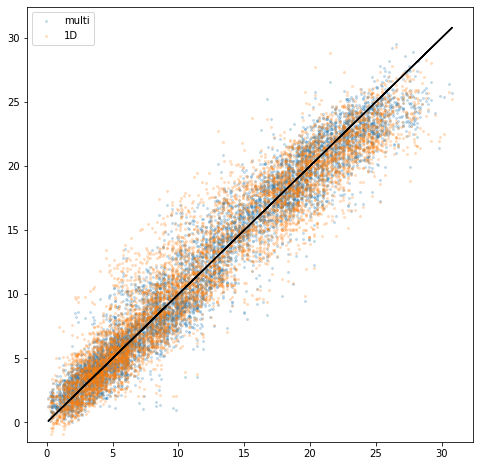

In [8]:
plt.figure(figsize=(8, 8))
plt.scatter(Y, predict_all, s=4, alpha=.2, label='multi')
plt.scatter(Y, predict_1d, s=4, alpha=.2, label='1D')
plt.plot(Y, Y, color='k')
plt.ylim(plt.gca().get_xlim())
plt.legend()


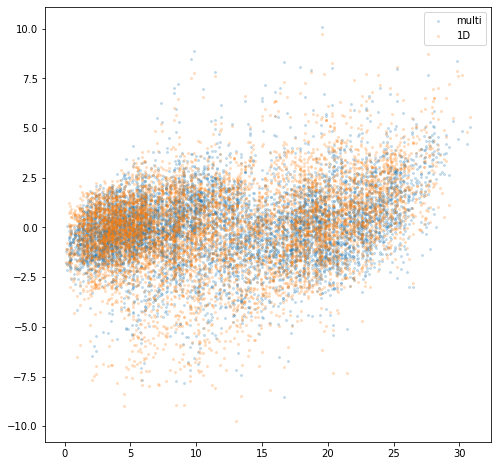

In [9]:
plt.figure(figsize=(8, 8))
plt.scatter(Y, Y - predict_all, s=4, alpha=.2, label='multi')
plt.scatter(Y, Y - predict_1d, s=4, alpha=.2, label='1D')
#plt.plot(Y, Y, color='k')
#plt.ylim(plt.gca().get_xlim())
plt.legend()


In [37]:
# Generate sample data
X = all_data[[x + '_' + rec for x in x_vals for rec in receivers]]
y = all_data['PWV']

# Fit regression model
svr_rbf = SVR(kernel='rbf')
svr_lin = SVR(kernel='linear')
svr_poly = SVR(kernel='poly')


In [38]:
svr_rbf_fit = svr_rbf.fit(X, y)
svr_lin_fit = svr_lin.fit(X, y)
svr_lin_fit = svr_lin.fit(X, y)


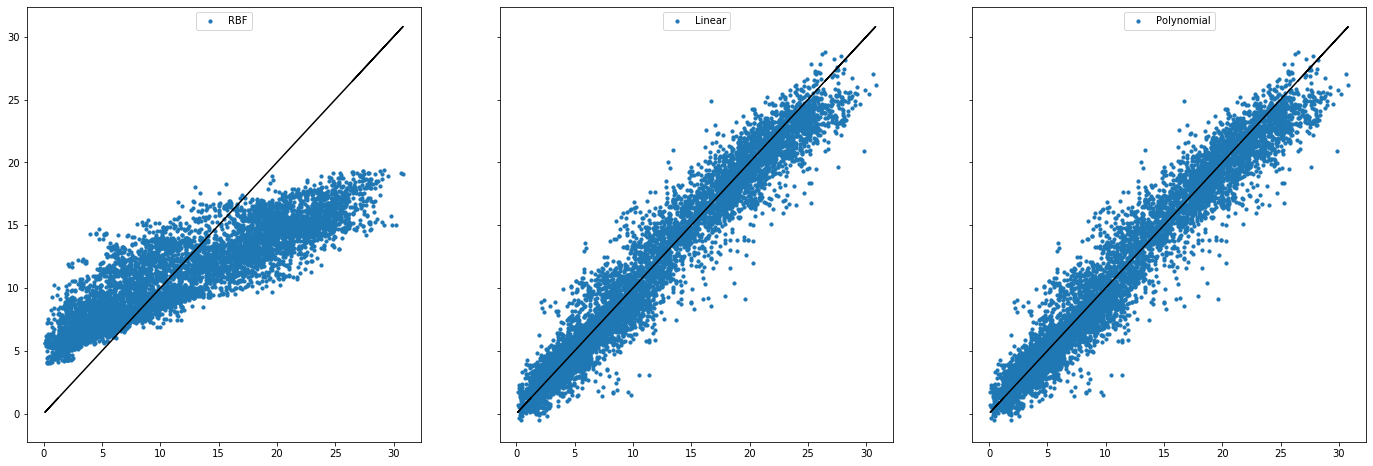

In [43]:
svrs = [svr_rbf_fit, svr_lin_fit, svr_lin_fit]
kernel_label = ['RBF', 'Linear', 'Polynomial']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 8), sharey=True)
for axis, k_label, svr_fit in zip(axes, kernel_label, svrs):
    axis.scatter(y, svr_fit.predict(X), label=k_label, s=10)
    axis.legend(loc='upper center')
    axis.plot(y, y, color='k')

plt.show()


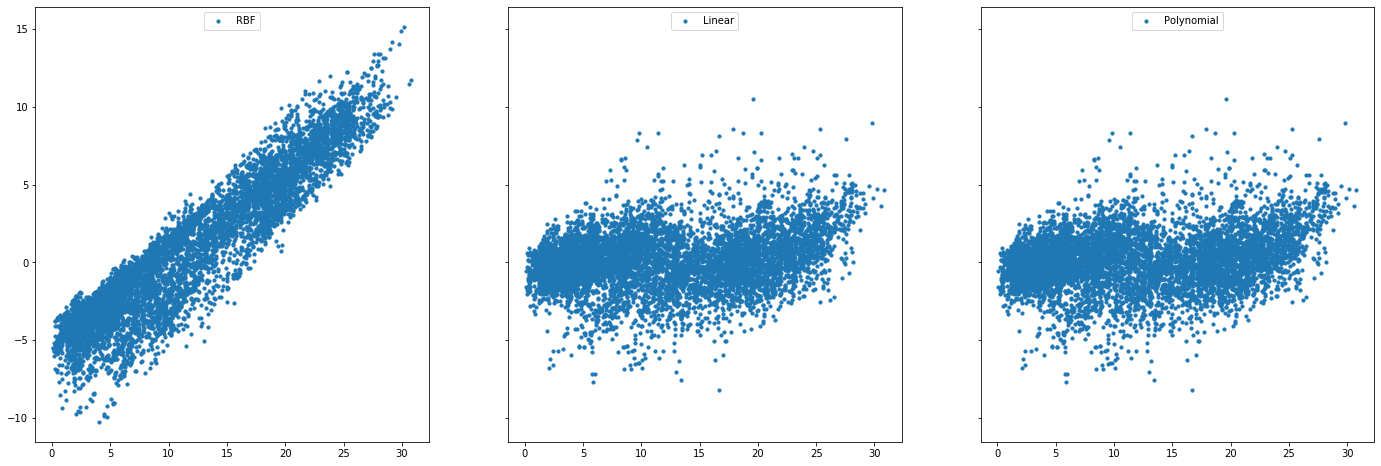

In [44]:
svrs = [svr_rbf_fit, svr_lin_fit, svr_lin_fit]
kernel_label = ['RBF', 'Linear', 'Polynomial']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 8), sharey=True)
for axis, k_label, svr_fit in zip(axes, kernel_label, svrs):
    axis.scatter(y, y - svr_fit.predict(X), label=k_label, s=10)
    axis.legend(loc='upper center')

plt.show()
